### REDES NEURONALES CON PYTHON Y KERAS

#### PRINCIPIO DE FUNCIONAMIENTO
Keras API se comunica con TensorFlow (Backend) para el manejo de las redes neuronales y TensorFlow hace uso de la GPU para el procesamiento matemático.

<div>
    <p style = 'text-align:center;'>
        <img src="imgs/frameworks.png" width="700px">
    </p>
</div>

#### PRINCIPALES PROBLEMAS CON EL DEEP LEARNING

<div>
    <p style = 'text-align:center;'>
        <img src="imgs/problems.png" width="700px">
    </p>
</div>

#### NUESTRA PRIMERA RED NEURONAL CON KERAS

In [1]:
# Importamos las librerías a emplear
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Trabajaremos con el dataset MNIST: números escritos a mano
# url:https://keras.io/api/datasets/mnist/
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
#Visualizamos el tamaño del dataset
train_data.shape

(60000, 28, 28)

In [8]:
#Imprimimos el primer dato
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

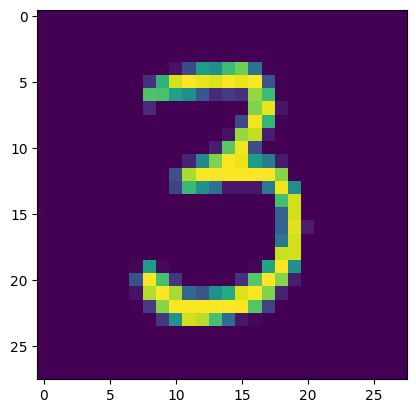

In [13]:
#Visualizamos el array
plt.imshow(train_data[50])
plt.show()

In [14]:
#Verificamos si coincide con su label
train_labels[50]

3

#### CREAMOS UN MODELO DE DATOS

In [28]:
#Modelo secuencial de red neuronal
model = models.Sequential()

#Agregamos nuestras capas de redes neuronales
model.add(layers.Dense(512, activation = "relu", input_shape = (28*28, )))
model.add(layers.Dense(10, activation = "softmax")) #10 neuronas porque tenemos 10 posibles salidas (0-9)

In [29]:
model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### LIMPIEZA DE DATOS

In [31]:
#Pasamos de 3 dimensiones a 2 dimensiones
#Dividimos entre 255 porque es el valor máximo de cada pixel, obtenemos valores de 0 a 1
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [32]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
train_labels[0]

5

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### ENTRENANDO EL MODELO

In [25]:
model.fit(x_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2647 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1065 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0691 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0500 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0373 - accuracy: 0.9887


In [26]:
#Evaluación del modelo
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9829


[0.05929150432348251, 0.9829000234603882]